# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

#### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import itertools
import sklearn
from sklearn.naive_bayes import GaussianNB
import scipy
from scipy.stats import norm
import seaborn as sns




#### Data Generation

In [2]:
# Data generation

#data of Gaussian Distributions
np.random.seed(seed = 3) # for fixing the distribution generated each time
#distribution1                    #distribution1 and distribution2 are the 2 classes to be segregated
mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T # generating Normal data for fitting Bayesian and Naive Bayes algo
#distribution2
mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T



In [3]:
def Bayes_class(X,all_mu,all_sigma): 
    #Returns the predicted class from an optimal bayes classifier if provided with the parameters of 2 Gaussian classes
    scores_list = []
    classes = len(all_mu)
    
    for p in range(classes): # Loop over all the classes for judging each element of X to which class it belongs 
        score = scipy.stats.multivariate_normal.pdf(X, mean=all_mu[p], cov=all_sigma[p])
        scores_list.append(score)
    
    c= np.argmax(scores_list)
    return c

#### Excercise: A) Plot the decision boundary

(200, 200) (200, 200)


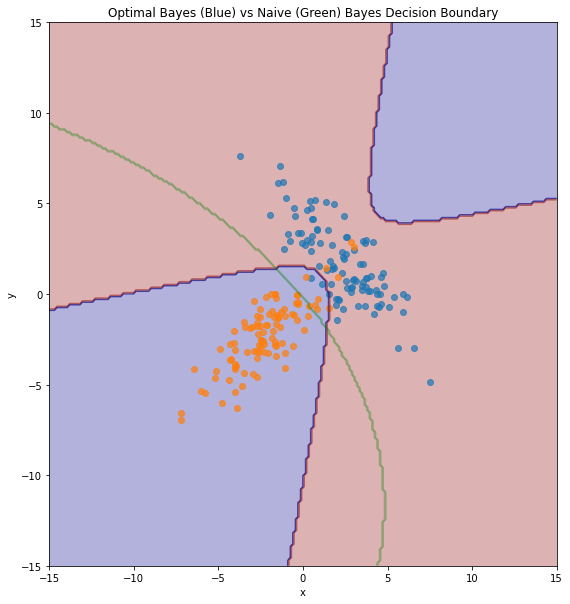

In [4]:
#%%%%%%%%%%%%%% Excercise: Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the decision boundary for the optimal and the naive Bayes classifiers goes here
"""

all_mu = [mu1,mu2] #list of the mean value for each class
all_sigma =[sigma1,sigma2]  #list of the sigma value for each class
colors = ['darkred','darkblue']

# Our 2-dimensional distribution will be over variables X and Y
N = 200                          # X and Y are the 2 dimensions of the test data
X = np.linspace(-15, 15, N)      #Returns evenly spaced N values between -15 and 15
Y = np.linspace(-15, 15, N)      
X, Y = np.meshgrid(X, Y)        #Creating 2D vectors using X and Y
print(X.shape,Y.shape)
#Setup of figure
fig = plt.figure(figsize = (20,10))
# #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

# Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 1)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ Bayes_class(np.array([xx,yy]),all_mu,all_sigma) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape) #array containing the class of every element of (X,Y) according to Optimal Bayes

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .5, colors = ('darkred','darkblue'))
ax.contourf( X, Y, Z, 1, alpha = .3, colors = ('darkred','darkblue'))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data....Arranging data for getting 
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)            #Obtaining parameters for the 2 Gauss-classes defined by labels

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('green'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal Bayes (Blue) vs Naive (Green) Bayes Decision Boundary')



plt.show()

#### Excercise: B) Accuracies

In [5]:
#%%%%%%%%%%%%%% EXCERCISE - Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the accuracies of the optimal and the naive Bayes classifiers goes here
"""
#Optimal Bayes accuracy
y_pred = np.array(  [Bayes_class(np.array([xx,yy]),all_mu,all_sigma) 
                     for xx, yy in zip(np.ravel(X_data[:,0]), np.ravel(X_data[:,1])) ] )
display(np.mean(y_pred == y_labels))


#Naive Bayes accuracy
display(model_sk.score(X_data,y_labels))



0.965

0.95